# filtered exon 985 expr heatmap

In [2]:
import subprocess
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [51]:
expr_filtered_exon_gene_clean_embryoTissue = pd.read_csv(
    '/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/analysis_embryoExon_tissueExon/embryo_tissue_filtered_expr_mean_high_corr_exonOver50_TPM6_TPM0p8.tsv',
    sep = "\t"
)

In [52]:
for i,stage in enumerate(expr_filtered_exon_gene_clean_embryoTissue.columns) :
    print(i-1, stage)

-1 exon_id
0 oocyte
1 1_cell
2 2_cell
3 4_cell
4 24_cell
5 64_cell
6 128_cell
7 256_cell
8 1k_cell
9 high
10 oblong
11 4hpf
12 sphere
13 dome
14 50epi
15 6hpf
16 shield
17 7hpf
18 8hpf
19 bud
20 10.33hpf
21 16hpf
22 19hpf
23 20ss
24 24hpf_pgc
25 24hpf
26 24hpf_somatic
27 elife_30860_24hpf
28 28hpf
29 elife_30860_30hpf
30 36hpf_endothelial
31 36hpf_HSPC
32 36hpf_neural_crest
33 36hpf_NHC
34 36hpf_sample1
35 36hpf_sample2
36 elife_30860_36hpf
37 36hpf_pgc
38 36hpf_somatic
39 2dpf
40 elife_30860_2dpf
41 52hpf_allskin
42 52hpf_basal
43 52hpf_CHT_NHC
44 52hpf_periderm
45 56hpf_heart
46 3dpf_CHT_endothelial
47 3dpf_CHT_HSPC
48 3dpf_CHT_NHC
49 3dpf_kidney
50 72hpf_allskin
51 72hpf_basal
52 72hpf_neural_crest
53 72hpf_periderm
54 elife_30860_3dpf
55 4dpf_CHT_HSPC
56 4dpf_CHT_NHC
57 4dpf_endothelial
58 4dpf_podocytes
59 4dpf_vascular_muscle_acta2_n_fosc1b_n
60 4dpf_vascular_muscle_acta2_n
61 4dpf_vascular_muscle_acta2_p
62 elife_30860_4dpf
63 5dpf_sample1
64 5dpf_beta
65 5dpf_sample2
66 5dpf_va

In [53]:
plot_df

,oocyte,1_cell,2_cell,4_cell,24_cell,64_cell,128_cell,256_cell,1k_cell,high,...,kidney_HSC_gata2a_p_runx1,kidney,liver_female,liver_male,liver,muscle,retina_muller,valve,ventricle,testis
104,670.816063,455.332329,567.605574,519.131274,475.083415,156.944313,110.151690,249.587719,64.913558,152.773131,...,0.165015,0.000000,0.034036,0.0,0.000000,0.378564,0.137369,0.0,0.000000,0.000000
105,74.765965,101.075604,156.817586,9.549855,309.151332,4.054884,34.081047,27.155513,26.163226,47.905322,...,0.041254,0.000000,0.068072,0.0,0.017190,0.049811,0.103027,0.0,0.000000,0.000000
17,0.247383,119.304537,73.964251,2.956260,308.391776,3.386634,48.753185,4.248457,38.666308,115.048400,...,0.000000,0.059561,0.000000,0.0,0.000000,0.000000,0.103027,0.0,0.000000,0.000000
472,47.367762,55.331151,54.389988,48.119198,67.571647,14.544395,33.326705,34.211945,31.747669,54.137267,...,0.000000,0.025760,0.034036,0.0,0.017576,0.079698,0.000000,0.0,0.022355,0.765919
572,306.359981,61.473830,91.049699,23.647748,88.014618,0.000000,6.460570,1.793953,6.329925,6.543033,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.669962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.000000,0.698744,0.064599,0.000000,0.486046,0.000000,0.022456,0.051969,0.054949,5.175236,...,0.042960,0.012880,0.000000,0.0,0.017190,0.000000,0.042900,0.0,0.000000,0.258299
486,0.000000,0.493593,0.023462,0.000000,0.047983,0.000000,0.000000,0.008315,0.019615,5.582174,...,0.041254,0.000000,0.034695,0.0,0.017383,0.012036,0.115557,0.0,0.000000,0.040618
687,6.323738,0.000000,0.000000,0.030953,0.007844,0.000000,0.000000,0.007104,0.003708,0.021175,...,0.000000,0.000000,0.000000,0.0,0.000000,0.012238,0.000000,0.0,0.000000,0.007882
910,0.000000,0.027490,0.000000,0.000000,0.000000,0.126015,0.023871,5.196852,0.023773,0.052814,...,0.000000,0.000000,0.000000,0.0,0.008788,0.000000,0.000000,0.0,0.000000,0.000000


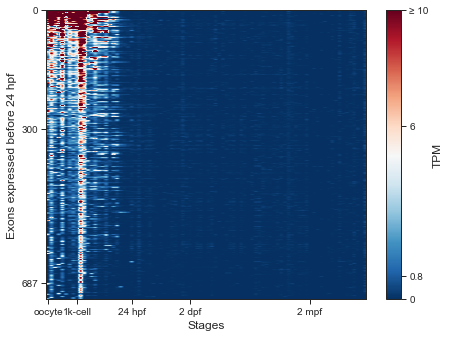

In [57]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 14,
                             'axes.labelsize': 12,
                             'xtick.labelsize': 10,
                             'ytick.labelsize': 10,
                             'legend.fontsize': 10
                         }):
    

    plot_df = expr_filtered_exon_gene_clean_embryoTissue.iloc[:,1:].copy()
    plot_df['rank'] = plot_df.mean(axis = 1)
    plot_df = plot_df.sort_values('rank', ascending = False).drop('rank', axis = 1)
    fig, ax = plt.subplots(figsize = (6.4, 4.8), tight_layout = True)
    pos = ax.imshow(plot_df,
                  aspect = 'auto',
                  vmax = 10,
                  vmin = 0,
                  cmap = 'RdBu_r'
                )

#     ax.set_yticks([0,500,984])
    ax.set_yticks([0,300,687])
    ax.set_yticklabels(['0', '300', '687'])
    ax.set_ylabel('Exons expressed before 24 hpf')
    ax.set_xticks([0, 8, 23, 39, 72])
#     ax.set_xticks(range(88))
#     ax.set_xticklabels(plot_df.columns, rotation = 90)
    ax.set_xticklabels(['oocyte', '1k-cell', '24 hpf', '2 dpf', '2 mpf'])
    ax.set_xlabel('Stages')
    ax.set_title('')
#     else :
#         fig, ax = plt.subplots(figsize = (4, 3), tight_layout = True)
#         cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[x for x in range(11)])
#         cbar.set_label('Normalized TPM')
#         cbar.ax.set_yticklabels([str(x) for x in range(11)])                 

    fig.subplots_adjust(right=0.85)
#     cbar_ax = fig.add_axes([0.88, 0.15, 0.04, 0.7])
#     fig.colorbar(pos, cax=cbar_ax)
    cbar = fig.colorbar(pos, ax=ax, extend='neither', ticks=[0, 0.8, 6, 10])
    cbar.set_label('TPM')
    cbar.ax.set_yticklabels(['0', '0.8', '6', '≥ 10']) 
    
#     fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_filteredExon985_expr.pdf', transparent = True)
    fig.savefig(f'/mnt/Storage/home/wangyiman/maternal_loading/2.public_data/figures/make2_heatmap_filteredExon687Gene361_expr.pdf', transparent = True)
    

In [38]:
ax.get_yticks()

array([ 784.,  984., 1184., 1384., 1584., 1784., 1984.])